In [ ]:
%pip install easyocr

In [1]:
import easyocr
reader = easyocr.Reader(['en'],gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
import cv2
image = "img1.png"
image = cv2.imread(image)

In [3]:
easy_ocr_result = reader.readtext(image,detail = 1, paragraph = False)
print(easy_ocr_result)

[([[20, 20], [382, 20], [382, 44], [20, 44]], 'As an expert in real estate with 30 years of experience,', 0.5114377452418275), ([[388, 20], [678, 20], [678, 44], [388, 44]], 'have searched through various websites to', 0.8550258227424845), ([[18, 44], [648, 44], [648, 68], [18, 68]], 'find the best properties that match your requirements. Based on my analysis,here are the top', 0.5362272452728626), ([[23, 71], [203, 71], [203, 89], [23, 89]], 'options that | recommend:', 0.6676999819856129), ([[22, 110], [103, 110], [103, 130], [22, 130]], 'Property 1:', 0.7529791371004049), ([[48, 148], [664, 148], [664, 172], [48, 172]], 'Builder/Group Name: [Insert builder name or group name from the website of the property]', 0.6080013941900098), ([[51, 176], [263, 176], [263, 195], [51, 195]], 'Location: Maharashtra,in Pune', 0.8031326897130785), ([[51, 207], [85, 207], [85, 223], [51, 223]], 'BHK', 0.9996459011235997), ([[83, 202], [188, 202], [188, 228], [83, 228]], 'Configuration:', 0.999683203

In [ ]:
# for (coord, text) in easy_ocr_result:
#   (topleft, topright, bottomright, bottomleft) = coord
#   tx, ty = int(topleft[0]), int(topleft[1])
#   bx, by = int(bottomright[0]), int(bottomright[1])
#   print(text)
#   cv2.rectangle(easy_ocr_img, (tx, ty), (bx, by), (0, 0, 255), 2)
#   cv2.putText(easy_ocr_img, text, (tx - 300, ty - 50), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 8)

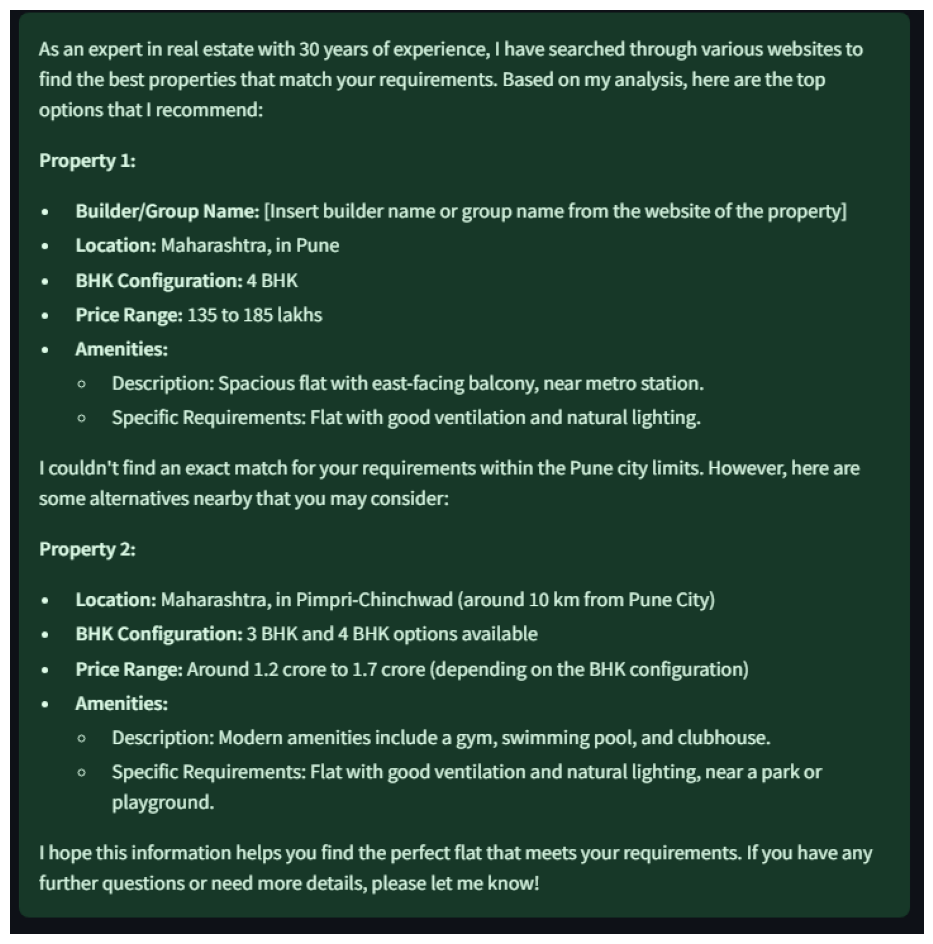

In [6]:
import supervision as sv
easy_ocr_img=image
sv.plot_image(easy_ocr_img)

In [ ]:
import cv2
import easyocr
import supervision as sv

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'], gpu=True)

# Read the image
image_path = "img1.png"
image = cv2.imread(image_path)

# Perform OCR
easy_ocr_result = reader.readtext(image, detail=1, paragraph=False)

# Display results and draw bounding boxes
for result in easy_ocr_result:
    # Unpack the result
    coord, text, confidence = result  # Now correctly unpacking three elements

    # Extract bounding box coordinates
    (topleft, topright, bottomright, bottomleft) = coord
    tx, ty = int(topleft[0]), int(topleft[1])
    bx, by = int(bottomright[0]), int(bottomright[1])

    # Print the recognized text
    print(f"Text: {text} (Confidence: {confidence})")


    # Draw bounding box and text on the image
    cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 2)
    cv2.putText(image, text, (tx, ty - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# # Display the image with annotations
# cv2.imshow("EasyOCR Result", image)
# # image = cv2.imread(image)
# # sv.plot_image(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [13]:
# Save the image to a file
output_path = "annotated_image.jpg"
cv2.imwrite(output_path, image)
print(f"Annotated image saved at {output_path}")


Annotated image saved at annotated_image.jpg


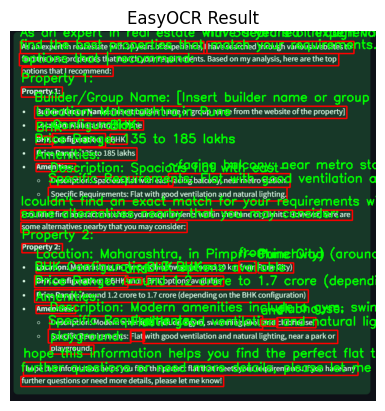

In [14]:
import matplotlib.pyplot as plt
import cv2

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes for better visualization
plt.title("EasyOCR Result")
plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Annotated image saved at annotated_image.jpg


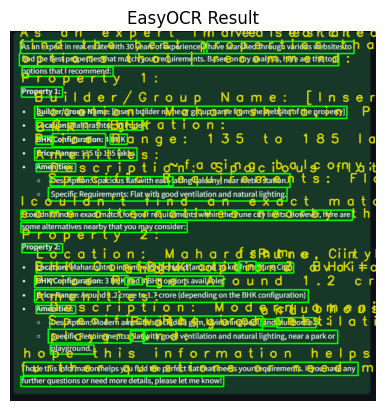

In [3]:
import cv2
import easyocr
import supervision as sv
import matplotlib.pyplot as plt
import cv2
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'], gpu=True)

# Read the image
image_path = "img1.png"
image = cv2.imread(image_path)

# Perform OCR
easy_ocr_result = reader.readtext(image, detail=1, paragraph=False)

for (bbox, text, prob ) in easy_ocr_result:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0])), (int(tl[1]))
    tr = (int(tr[0])), (int(tr[1]))
    br = (int(br[0])), (int(br[1]))
    bl = (int(bl[0])), (int(bl[1]))

    text = " ".join([c if ord(c) < 128 else " " for c in text]).strip()

    cv2.rectangle(image, tl, br, (0,255,0), 2)
    cv2.putText(image,text,(tl[0], tl[1] -10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,213,212),2 )

# cv2.imshow("imag", image)
# cv2.waitkey(0)

# Save the image to a file
output_path = "annotated_image.jpg"
cv2.imwrite(output_path, image)
print(f"Annotated image saved at {output_path}")


# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes for better visualization
plt.title("EasyOCR Result")
plt.show()

In [6]:
# for multi img in folder
import cv2
import glob
import pandas as pd

path="/images/*.* "
img_num = 1
reader = easyocr.Reader(['en'])

df = pd.DataFrame()
for file in glob.glob(path):
    print(file)
    img = cv2.imread(file,0)
    result = reader.readtext(img, detail=0, paragraph=True)
    df = df.append(pd.DataFrame({"image": file, "detect_text": result[0]}), ignore_index=True )
    img_num +=1

print(df)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Empty DataFrame
Columns: []
Index: []


""
